<a href="https://colab.research.google.com/github/bharatvarma24/rket-basket-analysis-tech-retail/blob/main/tech_market_basket.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
# STEP 1: Load required libraries
import pandas as pd  # For data handling
import matplotlib.pyplot as plt  # For plotting
import seaborn as sns  # For advanced visualization

In [52]:
# STEP 2: Load the dataset into a pandas DataFrame
df = pd.read_csv('/content/tech_market_basket-3.csv')

In [53]:
# STEP 3: View the first 5 rows to understand the structure
print("First 5 rows:")
print(df.head())

First 5 rows:
   TransactionID  CustomerID        Date  ProductID  \
0        1000000         189  2025-05-01         14   
1        1000001         446  2025-05-17          1   
2        1000001         446  2025-05-17          2   
3        1000001         446  2025-05-17         11   
4        1000001         446  2025-05-17         14   

                       ProductName     Category  Quantity  
0  Over-Ear Headphones – BassBoost        Audio         1  
1           Smartphone – XPhone 12       Mobile         1  
2       Smartphone Case – Silicone  Accessories         1  
3     Bluetooth Speaker – HomeBass        Audio         1  
4  Over-Ear Headphones – BassBoost        Audio         1  


In [54]:
# STEP 4: Check data structure and data types
print("\nDataset Info:")
print(df.info())



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17625 entries, 0 to 17624
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TransactionID  17625 non-null  int64 
 1   CustomerID     17625 non-null  int64 
 2   Date           17625 non-null  object
 3   ProductID      17625 non-null  int64 
 4   ProductName    17625 non-null  object
 5   Category       17625 non-null  object
 6   Quantity       17625 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 964.0+ KB
None


In [55]:
# STEP 5: Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
TransactionID    0
CustomerID       0
Date             0
ProductID        0
ProductName      0
Category         0
Quantity         0
dtype: int64


In [56]:
# STEP 6: View summary statistics for numeric columns
print("\nSummary statistics for numeric columns:")
print(df.describe())


Summary statistics for numeric columns:
       TransactionID    CustomerID     ProductID      Quantity
count   1.762500e+04  17625.000000  17625.000000  17625.000000
mean    1.006047e+06    550.961078      7.040567      1.098326
std     3.463683e+03    257.768047      4.271019      0.297764
min     1.000000e+06    100.000000      1.000000      1.000000
25%     1.003094e+06    330.000000      3.000000      1.000000
50%     1.006074e+06    553.000000      7.000000      1.000000
75%     1.009071e+06    776.000000     11.000000      1.000000
max     1.011999e+06    999.000000     15.000000      2.000000


In [57]:
# STEP 7: Check the number of unique transactions and products
print("\nUnique Transactions:", df['TransactionID'].nunique())
print("Unique Products:", df['ProductID'].nunique())


Unique Transactions: 8367
Unique Products: 15


In [58]:
# STEP 8: Check the top 10 most frequently purchased products
print("\nTop 10 most frequently purchased products:")
print(df['ProductName'].value_counts().head(10))


Top 10 most frequently purchased products:
ProductName
Smartphone Case – Silicone              2260
Smartphone – XPhone 12                  1549
Over-Ear Headphones – BassBoost         1481
USB-C Charger                           1479
Laptop Sleeve                           1465
Game Controller – PlayCube DualShock    1438
Bluetooth Speaker – HomeBass            1323
Wireless Earbuds – SoundPods            1176
Smartwatch – FitTime                    1051
Gaming Console – PlayCube                960
Name: count, dtype: int64


In [59]:
#DATA Cleaning and EDA Visualization
# STEP 9: Convert 'Date' column to datetime for time-based analysis
df['Date'] = pd.to_datetime(df['Date'])

In [60]:
# STEP 10: Check for duplicates
# Each row should represent a unique product in a transaction
# Check for complete duplicate rows
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


In [61]:
# STEP 11: Check for invalid Quantity values (Quantity should be >= 1)
invalid_quantities = df[df['Quantity'] < 1]
print(f"Rows with invalid quantities:\n{invalid_quantities}")

Rows with invalid quantities:
Empty DataFrame
Columns: [TransactionID, CustomerID, Date, ProductID, ProductName, Category, Quantity]
Index: []


In [62]:
# STEP 12: Add Month and Weekday columns for temporal EDA
df['Month'] = df['Date'].dt.month
df['Weekday'] = df['Date'].dt.day_name()


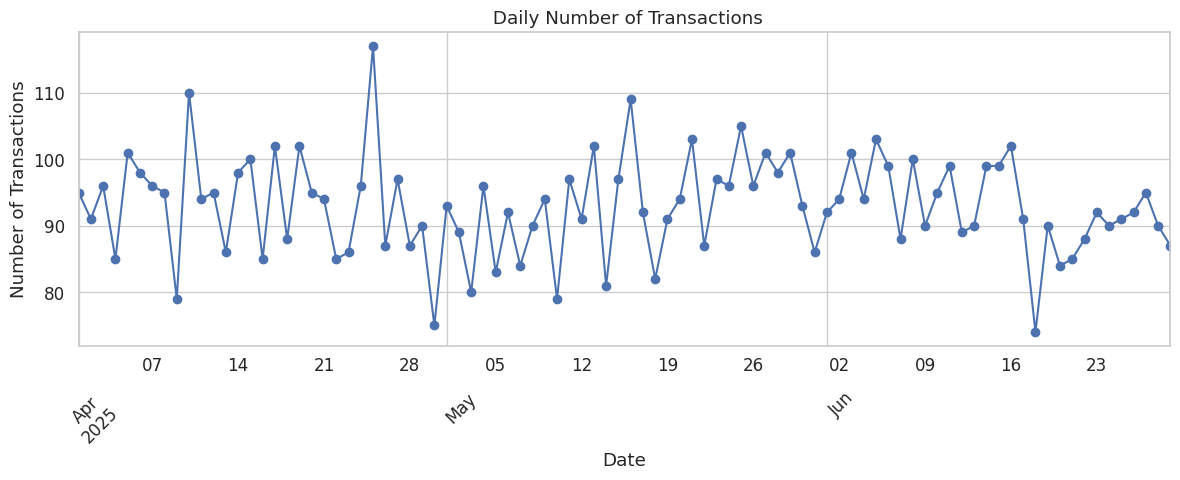

In [63]:
#Exploratory data analysis
# Daily number of transactions over time
daily_transactions = df.groupby('Date')['TransactionID'].nunique()

plt.figure(figsize=(12,5))
daily_transactions.plot(marker='o')
plt.title(' Daily Number of Transactions')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/tmp/ipython-input-73-1849231484.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


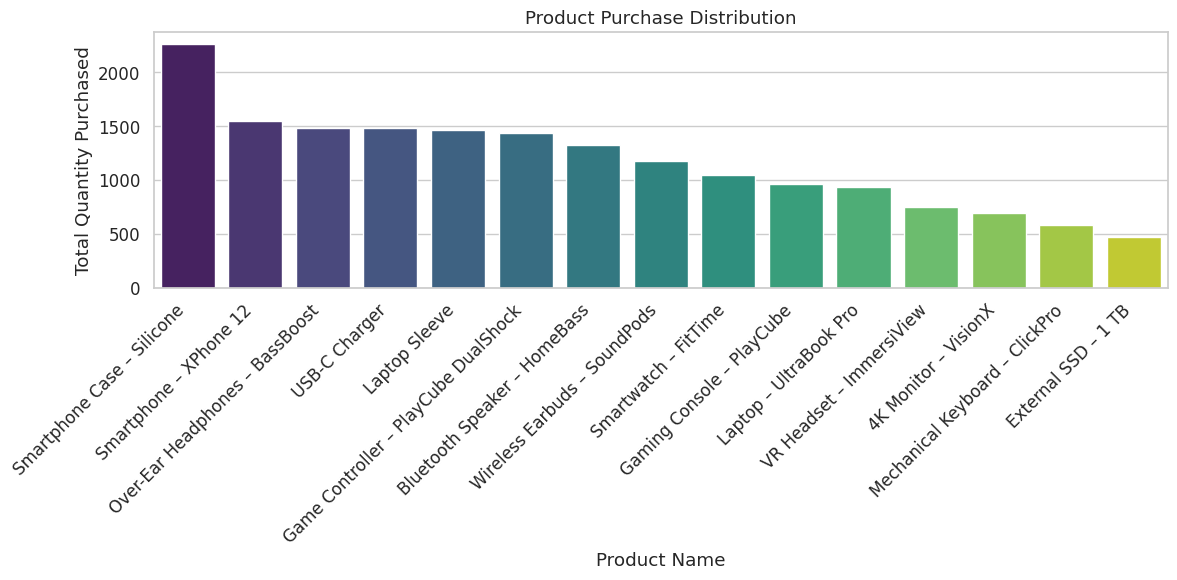

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your loaded DataFrame
# If not loaded:
# df = pd.read_csv('tech_market_basket.csv')

# STEP: Calculate item distribution
item_counts = df['ProductName'].value_counts().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    x=item_counts.index,
    y=item_counts.values,
    palette='viridis'
)

# Rotate x labels for readability
plt.xticks(rotation=45, ha='right')

# Titles and labels
plt.title('Product Purchase Distribution')
plt.xlabel('Product Name')
plt.ylabel('Total Quantity Purchased')

# Clean layout
plt.tight_layout()
plt.show()


In [64]:
df['Week'] = df['Date'].dt.isocalendar().week   # Week number in the year
# Create a new column to label 'Weekend' or 'Weekday'
df['DayType'] = df['Weekday'].apply(lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday')


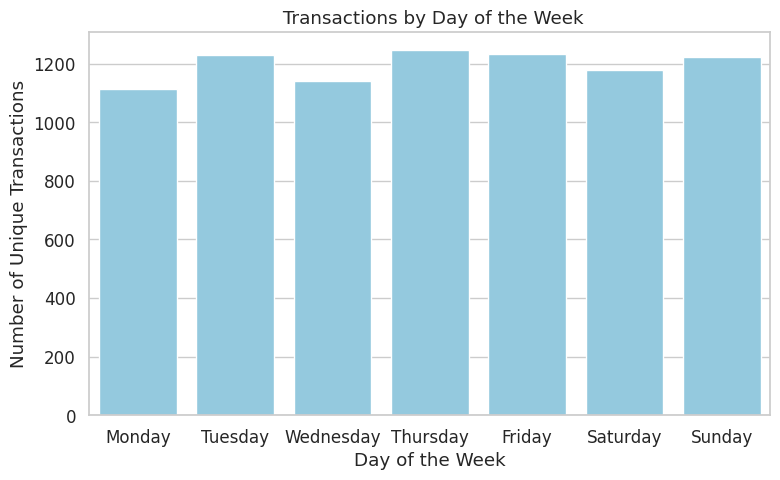

In [65]:
# Transactions by Day of Week
transactions_by_day = df.groupby('Weekday')['TransactionID'].nunique().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

plt.figure(figsize=(8,5))

# Updated: Use 'color' instead of 'palette' to avoid the deprecation warning
sns.barplot(x=transactions_by_day.index, y=transactions_by_day.values, color='skyblue')

plt.title(' Transactions by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Unique Transactions')
plt.tight_layout()
plt.show()

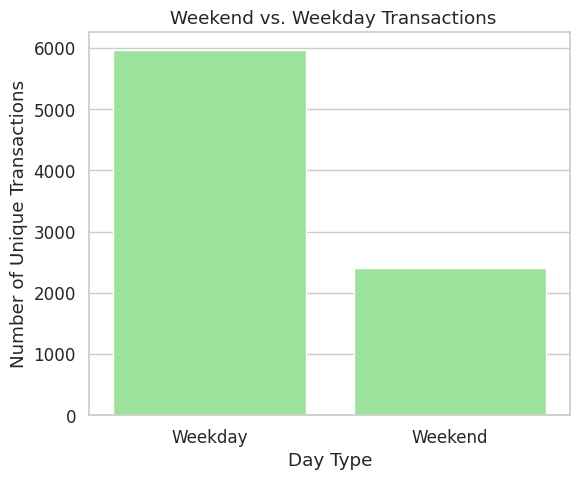

In [66]:
# Weekend vs. Weekday Transactions Overall
transactions_daytype = df.groupby('DayType')['TransactionID'].nunique()

plt.figure(figsize=(6,5))

sns.barplot(x=transactions_daytype.index, y=transactions_daytype.values, color='lightgreen')

plt.title(' Weekend vs. Weekday Transactions')
plt.xlabel('Day Type')
plt.ylabel('Number of Unique Transactions')
plt.tight_layout()
plt.show()

✅ Our EDA revealed higher weekday purchase patterns, guiding staffing and campaign planning.
✅ We plan to analyze whether cross-sells and product bundles differ between weekdays and weekends in future steps.


In [67]:
# !pip install mlxtend

import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

We will create a basket matrix where:

Rows = TransactionID
Columns = ProductName
Values = 1 (if purchased) or 0 (not purchased)

In [68]:
# Create basket matrix
basket = (df
          .groupby(['TransactionID', 'ProductName'])['Quantity']
          .sum()
          .unstack()
          .fillna(0)
          .applymap(lambda x: 1 if x >= 1 else 0)  # Convert quantities to 1/0
         )

# Preview the basket for understanding
basket.head()


/tmp/ipython-input-68-993143158.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  .applymap(lambda x: 1 if x >= 1 else 0)  # Convert quantities to 1/0


ProductName,4K Monitor – VisionX,Bluetooth Speaker – HomeBass,External SSD – 1 TB,Game Controller – PlayCube DualShock,Gaming Console – PlayCube,Laptop Sleeve,Laptop – UltraBook Pro,Mechanical Keyboard – ClickPro,Over-Ear Headphones – BassBoost,Smartphone Case – Silicone,Smartphone – XPhone 12,Smartwatch – FitTime,USB-C Charger,VR Headset – ImmersiView,Wireless Earbuds – SoundPods
TransactionID,,,,,,,,,,,,,,,
1000000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1000001,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0
1000002,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0
1000003,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
1000004,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0


In [69]:
from mlxtend.frequent_patterns import apriori

# Generate frequent itemsets
frequent_itemsets = apriori(basket, min_support=0.01, use_colnames=True)

# Sort to view the most frequent itemsets
frequent_itemsets = frequent_itemsets.sort_values(by='support', ascending=False)

# View the top 10 frequent itemsets for understanding
frequent_itemsets.head(10)


/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
9,0.270109,(Smartphone Case – Silicone)
10,0.185132,(Smartphone – XPhone 12)
8,0.177005,(Over-Ear Headphones – BassBoost)
12,0.176766,(USB-C Charger)
5,0.175093,(Laptop Sleeve)
3,0.171866,(Game Controller – PlayCube DualShock)
1,0.158121,(Bluetooth Speaker – HomeBass)
14,0.140552,(Wireless Earbuds – SoundPods)
68,0.135413,"(Smartphone – XPhone 12, Smartphone Case – Sil..."
11,0.125613,(Smartwatch – FitTime)


In [70]:
from mlxtend.frequent_patterns import association_rules

# Generate association rules using a lower confidence threshold if needed

rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)

# Sort rules by lift descending
rules = rules.sort_values(by='lift', ascending=False)

# Select relevant columns
rules_display = rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]

# Check if rules are generated
print("Shape of rules_display:", rules_display.shape)

# Display the top 10 rules clearly
rules_display.head(10)



Shape of rules_display: (163, 5)


,antecedents,consequents,support,confidence,lift
118,"(Bluetooth Speaker – HomeBass, Smartphone Case...",(VR Headset – ImmersiView),0.012549,0.432099,4.801289
121,(VR Headset – ImmersiView),"(Bluetooth Speaker – HomeBass, Smartphone Case...",0.012549,0.139442,4.801289
120,"(Smartphone Case – Silicone, VR Headset – Imme...",(Bluetooth Speaker – HomeBass),0.012549,0.729167,4.611442
144,"(Game Controller – PlayCube DualShock, Over-Ea...",(Gaming Console – PlayCube),0.010876,0.526012,4.584520
137,"(Laptop Sleeve, Game Controller – PlayCube Dua...",(Gaming Console – PlayCube),0.011235,0.519337,4.526347
8,(Bluetooth Speaker – HomeBass),(VR Headset – ImmersiView),0.063703,0.402872,4.476537
9,(VR Headset – ImmersiView),(Bluetooth Speaker – HomeBass),0.063703,0.707835,4.476537
131,"(Smartphone – XPhone 12, Game Controller – Pla...",(Gaming Console – PlayCube),0.011952,0.510204,4.446747
134,(Gaming Console – PlayCube),"(Smartphone – XPhone 12, Game Controller – Pla...",0.011952,0.104167,4.446747
111,"(Laptop Sleeve, Over-Ear Headphones – BassBoost)",(Wireless Earbuds – SoundPods),0.012908,0.624277,4.441607
